# AdaBoost

usamos la distribucion debil para el entretamiento

#### Error de la hipotesis debil

$$\epsilon _t=\mathbf{Pr}_{i\sim D_t}\left [ h_t(x_i)\neq y_i \right ]$$

In [22]:
#cargamos la bd iris desde el dataset de sklearn
from sklearn import datasets
import math
import numpy as np

iris = datasets.load_iris()

#Esta es la base de datos Iris del UCI Machine Learning Repository 
#https://archive.ics.uci.edu/ml/datasets/iris

X, Y = iris.data, iris.target

# numero de hipotesisdebiles
T = 10
# Numero total de muestras
M = X.shape[0]



# Array de pesos inicial
weights = np.ones((T,1)) * 1/M



In [23]:
def weight_t(e_t):
    return (0.5 * np.log((1 - e_t) / e_t))


    

In [59]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])

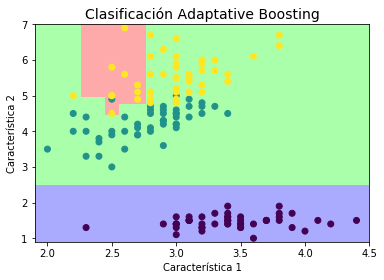

In [54]:
# cargamos el dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# creamos el adaboost-decision
clf = AdaBoostClassifier(n_estimators=50, random_state=0)

# entrenamos el modelo
model = clf.fit(iris.data[:,1:3], y)

x_min, x_max = X[:, 1].min() - .1, X[:, 1].max() + .1
y_min, y_max = X[:, 2].min() - .1, X[:, 2].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

Z = np.zeros((100,100))

#Evaluando las fdp's en una malla de valores
for i in range(100):
    for j in range(100):
        # print([xx[1,i],yy[j,1]])
        Z[i,j]=clf.predict(np.array([xx[1,i],yy[j,1]]).reshape(1,2))
plt.figure()
plt.title(u'Clasificación Adaptative Boosting', fontsize=14)
plt.xlabel(u'Característica 1')
plt.ylabel(u'Característica 2')
plt.pcolormesh(xx, yy, Z.T, cmap=cmap_light)
plt.scatter(X[:,1], X[:,2], c=y);

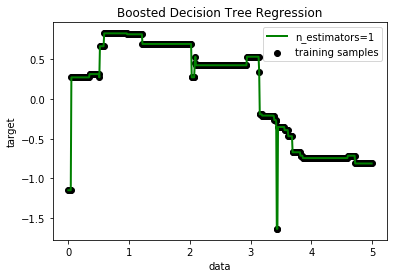

In [66]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))


clf_1 = AdaBoostRegressor()
clf_1.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = clf_1.predict(X_test)

# Plot the resu  et")
plt.figure()
plt.scatter(X_test, y_1, c="k", label="training samples")
plt.plot(X_test, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()